<hr><h1 align="center" style="font-family:Times New Roman;font-size:30px;text-shadow:0 0 10px #00b3ff,
							0 0 40px #00b3ff,
							0 0 80px #00b3ff,
							0 0 120px #00b3ff,
							0 0 200px #00b3ff,
							0 0 300px #00b3ff,
							0 0 400px #00b3ff;">Corona Virus Recognition using Chest X-Ray images</h1><hr>
  

### Importing Libraires

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from imutils import paths
import skimage
from skimage.transform import resize
import numpy as np

#### Importing dataset

In [2]:
dataset = r'C:\Xray\Data-20200727T153822Z-001\Data//'

In [27]:
INIT_LR = 1e-3 #Initial learning rate as 1e^3
EPOCHS = 2
BS = 32 #Batch size = 8

##### Converting the dataset into a dictionary

In [28]:
args = {}
args["dataset"] = dataset

In [29]:
args

{'dataset': 'C:\\Xray\\Data-20200727T153822Z-001\\Data//'}

### Using Numpy and CV2 so that to convert images into numerical format. 

In [30]:
iPaths = list(paths.list_images(args['dataset']))
img_data = []
labels = []

for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2] # -2 is for storing only the output label i.e., Normal or Covid
    image = cv2.imread(iPath) #Converts every image to numerical array format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Reszing the images before training into same size as traing get easy for model.
    image = cv2.resize(image, (224,224))
    img_data.append(image)
    labels.append(label)
img_data = np.array(img_data)/255.0
labels = np.array(labels)

In [31]:
image[0]

array([[ 65,  65,  65],
       [ 68,  68,  68],
       [ 66,  66,  66],
       [ 62,  62,  62],
       [106, 106, 106],
       [140, 140, 140],
       [157, 157, 157],
       [131, 131, 131],
       [121, 121, 121],
       [102, 102, 102],
       [109, 109, 109],
       [112, 112, 112],
       [105, 105, 105],
       [101, 101, 101],
       [100, 100, 100],
       [106, 106, 106],
       [110, 110, 110],
       [111, 111, 111],
       [112, 112, 112],
       [123, 123, 123],
       [135, 135, 135],
       [135, 135, 135],
       [123, 123, 123],
       [115, 115, 115],
       [ 98,  98,  98],
       [ 73,  73,  73],
       [ 75,  75,  75],
       [ 77,  77,  77],
       [ 78,  78,  78],
       [ 81,  81,  81],
       [ 85,  85,  85],
       [ 87,  87,  87],
       [ 88,  88,  88],
       [ 84,  84,  84],
       [ 90,  90,  90],
       [ 84,  84,  84],
       [ 83,  83,  83],
       [ 85,  85,  85],
       [ 84,  84,  84],
       [ 75,  75,  75],
       [ 79,  79,  79],
       [ 74,  74

In [32]:
image.shape

(224, 224, 3)

In [33]:
img_data

array([[[[0.52156863, 0.52156863, 0.52156863],
         [0.47843137, 0.47843137, 0.47843137],
         [0.45098039, 0.45098039, 0.45098039],
         ...,
         [0.5254902 , 0.5254902 , 0.5254902 ],
         [0.52156863, 0.52156863, 0.52156863],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.41568627, 0.41568627, 0.41568627],
         [0.36470588, 0.36470588, 0.36470588],
         [0.34509804, 0.34509804, 0.34509804],
         ...,
         [0.49411765, 0.49411765, 0.49411765],
         [0.48627451, 0.48627451, 0.48627451],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.21568627, 0.21568627, 0.21568627],
         [0.18039216, 0.18039216, 0.18039216],
         [0.18823529, 0.18823529, 0.18823529],
         ...,
         [0.4745098 , 0.4745098 , 0.4745098 ],
         [0.45490196, 0.45490196, 0.45490196],
         [0.99607843, 0.99607843, 0.99607843]],

        ...,

        [[0.96862745, 0.96862745, 0.96862745],
         [0.95294118, 0.95294118, 0.95294118]

In [34]:
labels

array(['Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Cov

In [35]:
Coronaimages = os.listdir(dataset+"Covid")
Normalimages = os.listdir(dataset+"Normal")

### Visualizing the X-Ray images of Covid and Normal person

Normal Chest X-ray Vs Covid-19 Chest X-ray


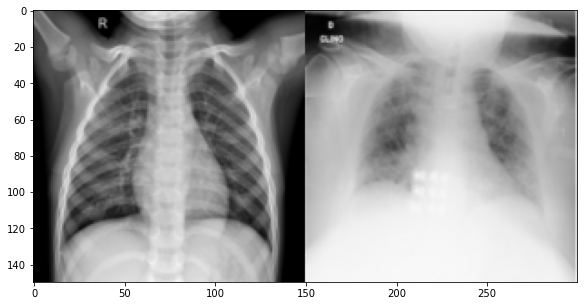

Normal Chest X-ray Vs Covid-19 Chest X-ray


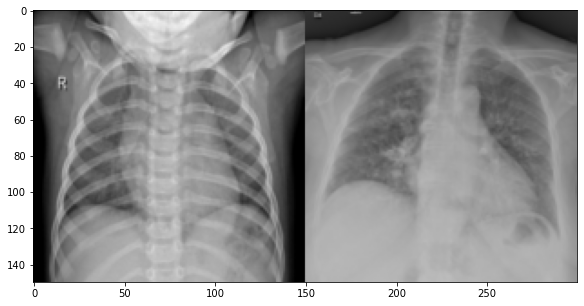

Normal Chest X-ray Vs Covid-19 Chest X-ray


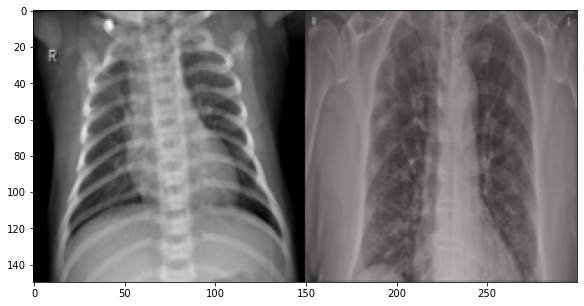

Normal Chest X-ray Vs Covid-19 Chest X-ray


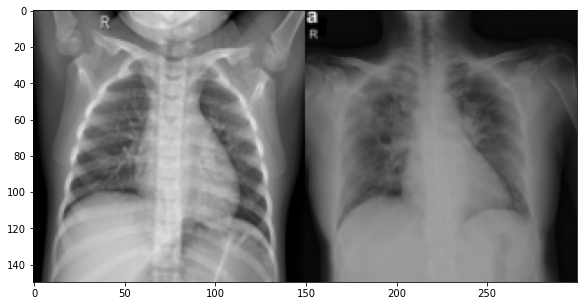

Normal Chest X-ray Vs Covid-19 Chest X-ray


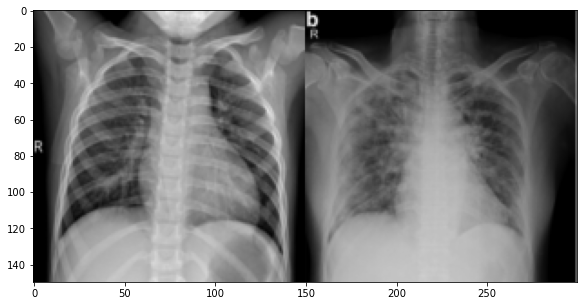

In [36]:
def plotter(i):
    normal = cv2.imread(dataset+"Normal//"+Normalimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(dataset+"Covid//"+Coronaimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

### Using LabelBinarizer method to categorize the output labels
#### [1. 0.] for Covid Person's x-ray and [0. 1.] for Normal person's X-ray

In [37]:
lb = LabelBinarizer()  #Initialize label binarizer
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

### Splitting the dataset using Train test split

In [38]:
(X_train, X_test, y_train, y_test) = train_test_split(img_data, labels,test_size=0.20, stratify=labels, random_state=42)
trainAug = ImageDataGenerator(rotation_range=15,fill_mode="nearest")

In [39]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160, 224, 224, 3), (40, 224, 224, 3), (160, 2), (40, 2))

In [40]:
trainAug

### Using VGG16 dataset and not taking the top layer.

In [41]:
baseModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))  #base_Model
headModel = baseModel.output #head_Model
headModel = AveragePooling2D(pool_size=(4, 4))(headModel) #AveragePooling2D takes the average of hidden layers tensor size of 4X4
headModel = Flatten(name="flatten")(headModel) #Flattening the Model with head model
headModel = Dense(64, activation="relu")(headModel) #Dense is a fully connected layer, Using Relu as activation function
headModel = Dropout(0.5)(headModel) # Dropout prevents model from Overfitting
headModel = Dense(2, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
    layer.trainable = False

In [42]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

C:\Users\dell\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


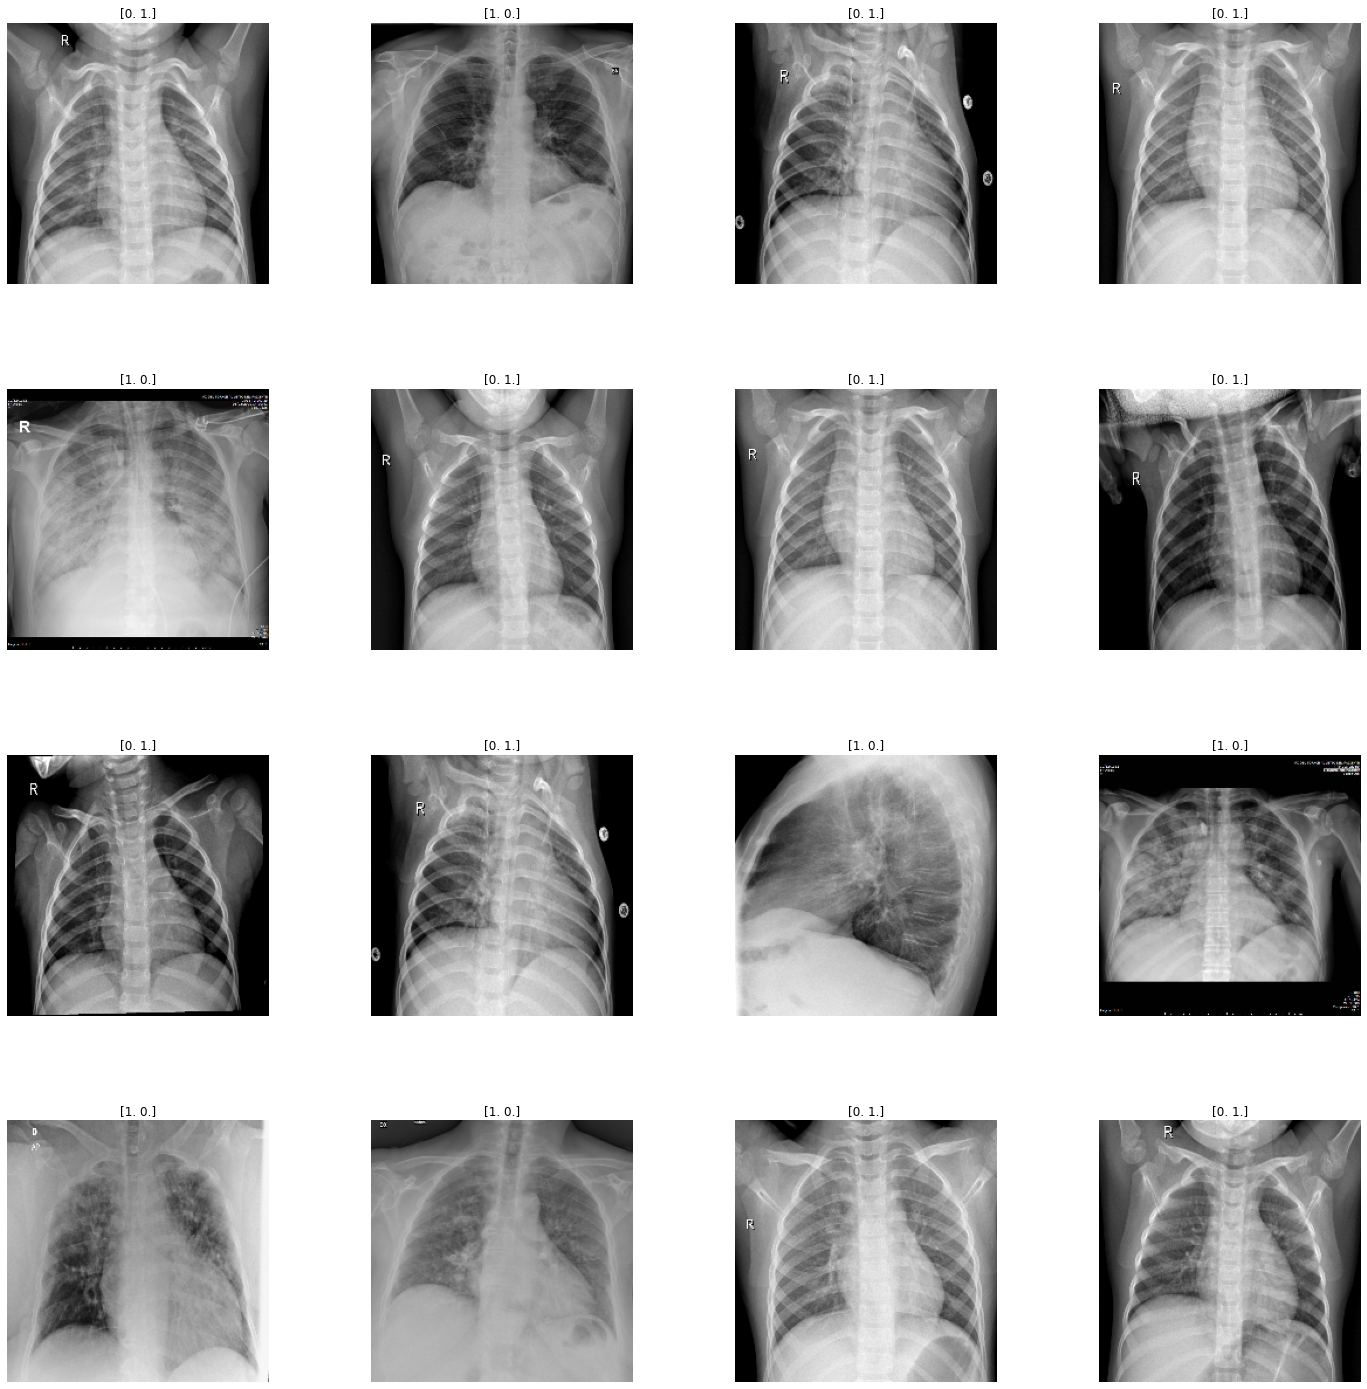

In [43]:
gridWidth = 4 #width of Grid
gridLength = 4 #lenth of Grid
fig, axes = plt.subplots(gridLength, gridWidth, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, gridLength * gridWidth):
    index = np.random.randint(0, n_training) # picking a random number X_train
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4) #horizantal space of length 0.4

In [44]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("Compiling Starts")
R = model.fit_generator(trainAug.flow(X_train, y_train, batch_size=BS),steps_per_epoch=len(X_train) // BS,validation_data=(X_test, y_test),validation_steps=len(X_test) // BS,epochs=EPOCHS)

Compiling Starts
  ...
    to  
  ['...']
Train for 5 steps, validate on 40 samples
Epoch 1/2
5/5 [==============================] - 2408s 482s/step - loss: 0.7596 - accuracy: 0.5312 - val_loss: 0.5286 - val_accuracy: 0.5000
Epoch 2/2
5/5 [==============================] - 2247s 449s/step - loss: 0.6905 - accuracy: 0.5562 - val_loss: 0.4521 - val_accuracy: 0.9688


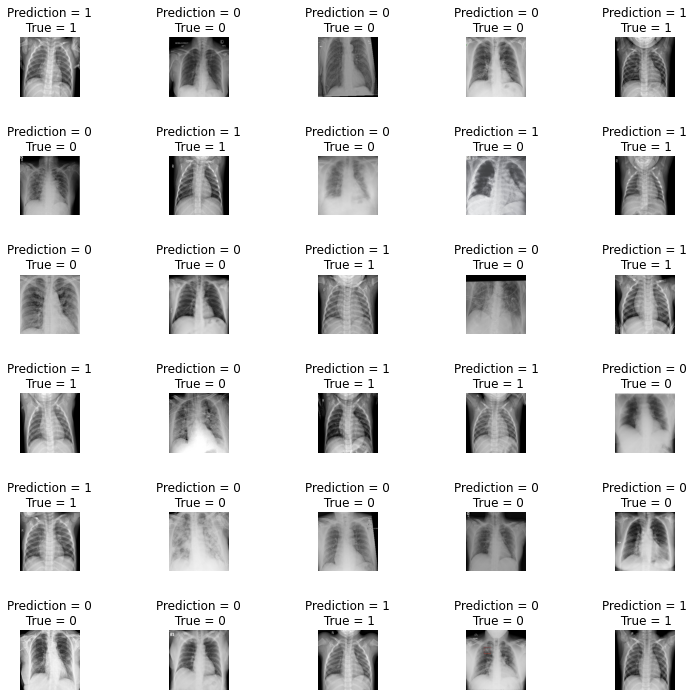

In [45]:
L = 6
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)   

In [46]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test.argmax(axis=1), y_pred,target_names=lb.classes_))

              precision    recall  f1-score   support

 Data//Covid       1.00      0.95      0.97        20
Data//Normal       0.95      1.00      0.98        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.argmax(axis=1),y_pred)

0.975

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[19  1]
 [ 0 20]]
acc: 0.9750
sensitivity: 0.9500
specificity: 1.0000


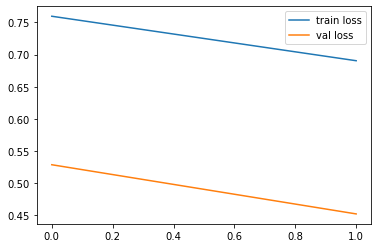

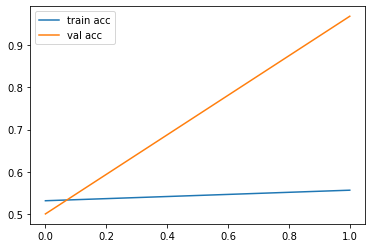

In [49]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [50]:
model.save('Covidmodel.h5')